In [9]:

import gc
gc.collect()
# install tensorflow 2.4.1
#install librosa

import tfcgan as tfg
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from datetime import datetime
from matplotlib import colors
import seaborn as sns   

num_lines = 3
color = sns.color_palette("coolwarm_r",num_lines)
color = ['r', 'g', 'b']


dirc  =  "/model/Generator_Model"
dirc = "Desktop/Work/Codes/Projects/TFCGAN/model/Generator_Model"

Model =  tfg.TFCGAN(dirc, scalemin = -10,
                    scalemax = 2.5485036, pwr = 1,
                    noise = 100, mtype = 0)

mode  =  "ADMM"

di = 1
rho = 1e-10
eps=1e-12
ab = 2


OSError: No file or directory found at Desktop/Work/Codes/Projects/TFCGAN/model/Generator_Model

In [5]:
mag = [4, 4.5, 5, 5.5, 6, 6.5, 7]

Distance = [40, 60, 80, 100, 120, 140, 160, 180]

vs30 = [200, 300, 400, 500, 600, 700, 800, 900]

address2 = "/home/reza/Desktop/dd/NN/binmaker2/"

#address2 = "/home/reza/Desktop/dd/NN/binmakerEpi/binmakerEpi/"

def readerbin(mag, dis, vs30):
    
    meta = np.load(address2 + "M_" + str(mag) +"_"+str(dis)+"_"+str(vs30) + ".npy")
    data = np.load(address2 + "D_" + str(mag) +"_"+str(dis)+"_"+str(vs30) + ".npy")
    
    return meta, data


def smoother(c, freq):
    m, n = c.shape
    mm = np.full_like(c, 0)
    for i in range(n):
        mm[:,i] = konnoohmachismoothing.konno_ohmachi_smoothing(c[:,i], freq)
    return mm


def collectorbin(mag, dis, vs):
    meta, data =readerbin(mag[0],dis[0] , vs[0])
    for i in range(len(mag)):
        metan, datan =readerbin(mag[i],dis[i] , vs[i])
        
        data = np.concatenate([data,datan])
        meta = np.concatenate([meta,metan])
        
    return meta, data


0
1
2


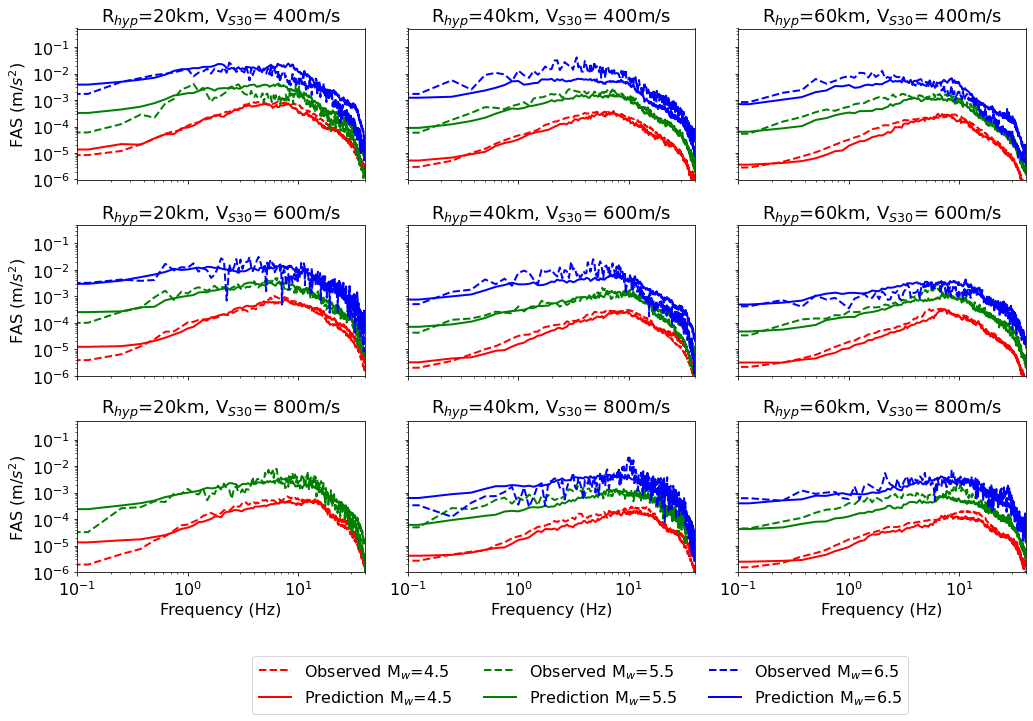

In [7]:
Distance = [20, 40, 60]
vs303 = [400, 600, 800]
ngen = 64
mage = [4.5, 5.5 , 6.5]


fig, (ax1) = plt.subplots( 3, 3,figsize = (17, 10), sharey=True, sharex=True)


fdeci = 5


for jvs, jv in enumerate([0,1,2]):
    for jind, j in enumerate([0,1, 2]):
        
        
        
        disind = j
        Vs30ind = jv
        
        ax = ax1[jv][jind]
        
        for i in range(len(mage)):
            
            meta, data = readerbin(mage[i], Distance[disind], vs303[Vs30ind])
            if len(data)== 0:
                meta1, data1 = readerbin(mage[i], Distance[disind], vs303[Vs30ind]-100)
                meta2, data2 = readerbin(mage[i], Distance[disind], vs303[Vs30ind]+100)
                data = np.concatenate([data1,data2])
                meta = np.concatenate([meta1,meta2])
            if len(data)!= 0:

                
                tx, freq1 , FAS, Spec, x = Model.Maker(mage[i]/1, Distance[disind]/1, vs303[Vs30ind], ngen, PRint = 20,  
                                          mode = mode, rho = rho, eps = eps, ab = ab)
                
                
                freq,lp = Model.fft(1*data)
                
                cc1 = np.mean(lp[::deci,:], axis=1)/1
                cc2 = np.mean(FAS[::deci,:],1)/1
                            
                
                ax.plot(freq[::deci], cc1,lw = 2, linestyle='--', c = color[i], label="Observed M$_{w}$="+str(mage[i]),)
                ax.plot(freq1[::deci], cc2,lw = 2, label="Prediction M$_{w}$="+str(mage[i]) ,c = color[i])
                
                
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        
        plt.ylim([1e-6, 5e-1])

        ax.set_xlim([0.1, 40])
        
        
        ax.set_title("R$_{hyp}$="+ str(Distance[disind])+"km, V$_{S30}$= "+
                         str(vs303[Vs30ind])+"m/s", fontsize=18)
        
        
    print(jvs)
    
ax1[0][0].set_ylabel('FAS (m/$s^{2}$)', fontsize=16)
ax1[1][0].set_ylabel('FAS (m/$s^{2}$)', fontsize=16)
ax1[2][0].set_ylabel('FAS (m/$s^{2}$)', fontsize=16)


ax1[-1][0].set_xlabel('Frequency (Hz)', fontsize=16)
ax1[-1][1].set_xlabel('Frequency (Hz)', fontsize=16)
ax1[-1][2].set_xlabel('Frequency (Hz)', fontsize=16)

ax1[2][0].tick_params(axis='x', labelsize=16)
ax1[2][1].tick_params(axis='x', labelsize=16)
ax1[2][2].tick_params(axis='x', labelsize=16)

ax1[0][0].tick_params(axis='y', labelsize=16)
ax1[1][0].tick_params(axis='y', labelsize=16)
ax1[2][0].tick_params(axis='y', labelsize=16)


ax.legend( loc='upper center', bbox_to_anchor=(-0.55, -0.5),
          fancybox=True, shadow=False, ncol=3, fontsize= 16)

plt.subplots_adjust(wspace=0.15, hspace=0.3)

plt.savefig("Figure10_2_3.pdf", dpi = 400, bbox_inches='tight')
